<a href="https://colab.research.google.com/github/srujayreddyv/sigmaml-q3/blob/main/notebooks/SigmaML_Q3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


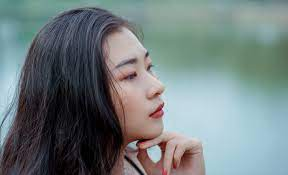

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

# Load the image
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/SigmaML/Quiz3/portrait_lady.png', cv.IMREAD_COLOR)

# Display the original image
cv2_imshow(image)

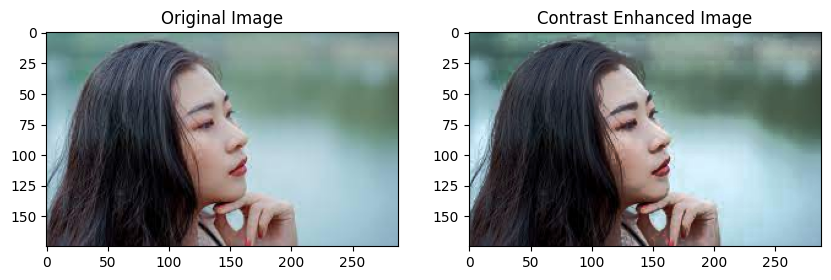

In [3]:
### Q1. Enhance the contrast of the image (using Histogram Equalization on HSV Value channel)
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hsv[..., 2] = cv.equalizeHist(hsv[..., 2])
enhanced_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display the original and enhanced images side by side for comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title("Contrast Enhanced Image")
plt.show()

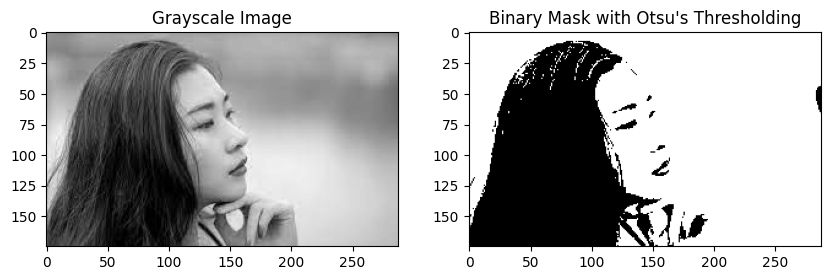

In [4]:
### Q2. Extract the mask of the person using Otsu's thresholding

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
ret2, mask = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the original grayscale image and the mask side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask with Otsu's Thresholding")
plt.show()

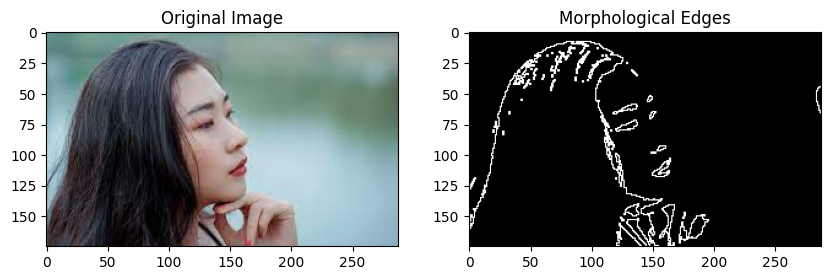

In [5]:
### Q3a. Extract edges using only morphological operations
kernel = np.ones((2,2), np.uint8)
morph_edges = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)

# Display the original and morphological edges side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(morph_edges, cmap='gray')
plt.title("Morphological Edges")
plt.show()

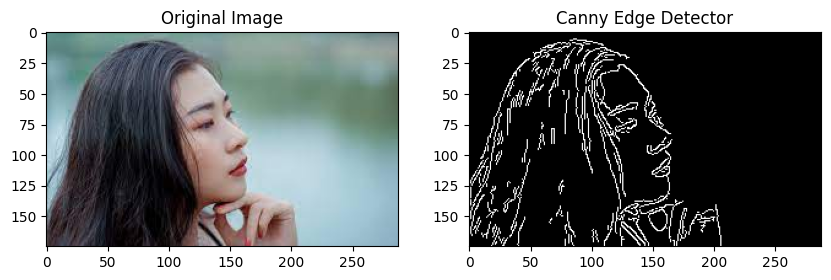

In [6]:
### Q3b. Extract edges using standard edge detector (Canny)
edges = cv.Canny(image, 100, 200)

# Display the original and edge-detected images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detector")
plt.show()

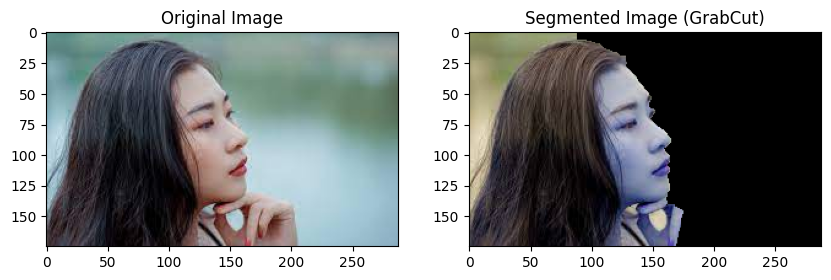

In [7]:
### Q4. Use GrabCut to segment the image
mask_grabcut = np.zeros(image.shape[:2], np.uint8)
rect = (0, 0, 175, 250)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask_grabcut, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to extract the segmented object
mask2 = np.where((mask_grabcut == 2) | (mask_grabcut == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

# Display the original and segmented images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented Image (GrabCut)")
plt.show()